In [1]:
import Calibration as cal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
path = r"../data"
sensor_type = "Calibration"

## Run calibration with NIR compensation

In [3]:
channels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'clear', 'nir']
nir_comp_all = []
stats_all = []

# Collect nir_comp for each iteration
for sensor_nr in range(1, 5):
    sensor_instance = cal.Calibration(path, sensor_nr, sensor_type)
    if sensor_instance.preprocessing(save_data=False, spectrum = "PAR"):
        sensor_instance.pls(channels=channels)
        _, nir_comp, _ = sensor_instance.plot_quantum_response(plot=False)
        nir_comp_all.append(nir_comp)
        stats_all.append(sensor_instance._repeatability())

Found matching files:
Calibration.2025.sensor1.csv
Coefficients (comma-separated): 29.11024906826017, 16.9939655307408, 12.12624803747697, 9.901982375441948, 9.042761980427278, 7.284044445211508, 6.791485333465561, 5.4651270923709445, -5.046215405876729, 0.2517810735710138
Coefficients saved to:  ../data/Calibration_coefficients.csv
Found matching files:
Calibration.2025.sensor2.csv
Coefficients (comma-separated): 37.29792177789769, 21.262297900993367, 16.97708091868878, 15.273172741787826, 13.322099267749344, 10.722226448569403, 12.603456126506261, 8.685011472704995, -5.392285634902561, 0.3293555215696629
Coefficients saved to:  ../data/Calibration_coefficients.csv
Found matching files:
Calibration.2025.sensor3.csv
Coefficients (comma-separated): 38.05196424495017, 21.2806692397086, 17.154453715770284, 14.894713879313365, 13.227683720750495, 11.686852936708064, 12.516697064035778, 9.850906196547745, -6.069419866752719, 0.3890088719154622
Coefficients saved to:  ../data/Calibration_coe

## Run calibration only with visible channels f1 to f8

In [4]:
channels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
wl_all = []
vis_all = []
PAR_all= []

for sensor_nr in range(1, 5):
    sensor_instance = cal.Calibration(path, sensor_nr, sensor_type)
    if sensor_instance.preprocessing(save_data=False, spectrum = "PAR"):
        sensor_instance.pls(channels=channels, save_coef=False)
        wl, vis, PAR = sensor_instance.plot_quantum_response(plot = False)
        wl_all.append(wl)
        vis_all.append(vis)
        PAR_all.append(PAR)

Found matching files:
Calibration.2025.sensor1.csv
Coefficients (comma-separated): 3.916067941105744, 4.540775002901742, 6.356520650544656, 5.873454815490502, 6.383070512231889, 5.844187486673903, 6.362705404583997, 3.743926169582209
Found matching files:
Calibration.2025.sensor2.csv
Coefficients (comma-separated): 34.76135055662475, 21.097057003082806, 17.6546564469306, 14.543893167607466, 12.222659060268843, 9.179365731090385, 11.40553352868044, 7.269065632125866
Found matching files:
Calibration.2025.sensor3.csv
Coefficients (comma-separated): 34.41021092523726, 20.958324387248293, 17.75947146365735, 14.051088434517794, 12.031352471124395, 9.757737774463381, 11.306200006677942, 8.138532306097833
Found matching files:
Calibration.2025.sensor4.csv
Coefficients (comma-separated): 36.97073569643011, 25.092140609745513, 21.173048650731097, 17.084558694852106, 14.117624616623377, 10.868468164486933, 14.283270261501116, 11.22656385436416


## Compare calibrations

R2 VIS: 0.799
R2 NIR: 0.934


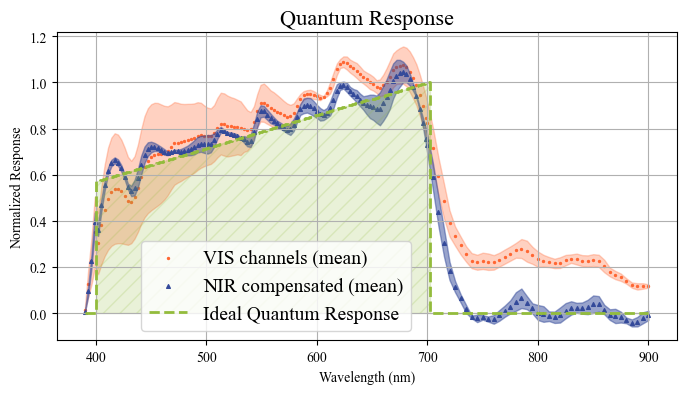

In [5]:
plt.figure(figsize=[8,4])

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

mean_vis = np.mean(vis_all, axis=0)
std_vis = np.std(vis_all, axis=0)
coef_of_variation_vis = std_vis / mean_vis * 100
#print(f"Coefficient of Variation VIS: {coef_of_variation_vis.mean():.3f}")
#print(f"Mean VIS: {mean_vis.mean():.3f}")
#print(f"Std VIS: {std_vis.mean():.3f}")

mean_nir_comp = np.mean(nir_comp_all, axis=0)
std_nir_comp = np.std(nir_comp_all, axis=0)
coef_of_variation_nir_comp = std_nir_comp / mean_nir_comp * 100
#print(f"Coefficient of Variation NIR Comp: {coef_of_variation_nir_comp.mean():.3f}")
#print(f"Mean NIR Comp: {mean_nir_comp.mean():.3f}")
#print(f"Std NIR Comp: {std_nir_comp.mean():.3f}")

# Filter data to only include wavelengths up to 900nm
wl_filtered = wl[wl <= 900]
mean_vis = mean_vis[:len(wl_filtered)]
std_vis = std_vis[:len(wl_filtered)]
mean_nir_comp = mean_nir_comp[:len(wl_filtered)]
std_nir_comp = std_nir_comp[:len(wl_filtered)]
PAR_filtered = PAR[:len(wl_filtered)]


#plt.scatter(wl, vis, label='VIS channels', color='#ff6733', marker='o', s=1)

plt.scatter(wl_filtered, mean_vis, label='VIS channels (mean)', color='#ff6733', marker='o', s=2)
plt.fill_between(wl_filtered, mean_vis - std_vis, mean_vis + std_vis, color='#ff6733', alpha=0.3)

plt.scatter(wl_filtered, mean_nir_comp, label='NIR compensated (mean)', color='#344a9a', marker='^', s=7)
plt.fill_between(wl_filtered, mean_nir_comp - std_nir_comp, mean_nir_comp + std_nir_comp, color='#344a9a', alpha=0.5)

#plt.scatter(wl, nir_comp, label='NIR compensated', color='#344a9a', s=3, marker='o')
plt.step(wl_filtered, PAR_filtered, linestyle='--', label=f'Ideal Quantum Response', color="#93bc3c", linewidth=2, where='mid')
plt.fill_between(wl_filtered, 0, PAR_filtered , color="#93bc3c", alpha=0.2, hatch='//', edgecolor='#93bc3c', step='mid')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

print(f"R2 VIS: {r2_score(PAR_filtered, mean_vis):.3f}")
print(f"R2 NIR: {r2_score(PAR_filtered, mean_nir_comp):.3f}")

plt.grid()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Response')
#plt.text(820, 0.23, f"R2: {r2_score(PAR, nir_comp):.3f}", fontsize = 14)
# Remove rows with NaN values in 'PAR' or 'PAR_calculated'
plt.title(f'Quantum Response')
#plt.title(f'{self.sensor_type} Sensor {self.sensor_number} Quantum Response')
plt.legend(loc = "lower left", bbox_to_anchor=(0.12,0.0), fontsize = 14)


## Calculate the calibration uncertainty between the four sensors

In [6]:
r2_all = []
for i, sensor in enumerate(nir_comp_all):
    r2 = r2_score(PAR, nir_comp_all[i])
    r2_all.append(r2)
    #print(f"r2: {i+1}: {r2:.3f}")
#print("-")
r2_all_vis = []
for i, sensor in enumerate(vis_all):
    r2 = r2_score(PAR, vis_all[i])
    r2_all_vis.append(r2)
    #print(f"r2 vis: {i+1}: {r2:.3f}")
#print("-")
print(f"R2 mean NIR compensation: {np.mean(r2_all)*100:.3f}")
print(f"R2 std NIR compensation: {np.std(r2_all)*100:.3f}")
print(f"relative uncertainty NIR compensation: {np.std(r2_all)/np.mean(r2_all)*100:.3f} %")
print("-")
print(f"R2 mean VIS: {np.mean(r2_all_vis)*100:.3f}")
print(f"R2 std VIS: {np.std(r2_all_vis)*100:.3f}")
print(f"relative uncertainty VIS: {np.std(r2_all_vis)/np.mean(r2_all_vis)*100:.3f} %")

R2 mean NIR compensation: 94.788
R2 std NIR compensation: 0.859
relative uncertainty NIR compensation: 0.906 %
-
R2 mean VIS: 79.858
R2 std VIS: 3.448
relative uncertainty VIS: 4.318 %


## Calculate relative uncertainty of repeatability and measurement uncertainty for each wavelength range.

In [7]:
CV_means_390 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "390_399"]
    CV_means_390.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_390 = np.sqrt(5**2 + np.mean(CV_means_390)**2)

CV_means_400 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "400_439"]
    CV_means_400.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_400 = np.sqrt(5**2 + np.mean(CV_means_400)**2)

CV_means_440 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "440_700"]
    CV_means_440.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_440 = np.sqrt(3**2 + np.mean(CV_means_440)**2)

CV_means_701 = []
for i in range(4):
    temp_stats = stats_all[i][stats_all[i]["range"] == "701_1100"]
    CV_means_701.append(temp_stats["std"].mean()/ temp_stats["mean"].mean() * 100)
uncertainty_701 = np.sqrt(3**2 + np.mean(CV_means_701)**2)

In [8]:
# Prepare rows
rows = [
    ("390_399", np.mean(CV_means_390), np.std(CV_means_390), uncertainty_390),
    ("400_439", np.mean(CV_means_400), np.std(CV_means_400), uncertainty_400),
    ("440_700", np.mean(CV_means_440), np.std(CV_means_440), uncertainty_440),
    ("701_1100", np.mean(CV_means_701), np.std(CV_means_701), uncertainty_701),
]

# Print header
print(f"{'Wavelength Range (nm)':<20} {'Repeatability (%)':<25} {'Measurement Uncertainty (%)':<30}")
print("-" * 75)

# Print rows
for wl_range, mean_val, std_val, uncertainty in rows:
    repeatability_str = f"{mean_val:.3f} ± {std_val:.3f}"
    print(f"{wl_range:<20} {repeatability_str:<25} {uncertainty:.3f}")


Wavelength Range (nm) Repeatability (%)         Measurement Uncertainty (%)   
---------------------------------------------------------------------------
390_399              1.253 ± 0.460             5.155
400_439              0.232 ± 0.015             5.005
440_700              0.102 ± 0.018             3.002
701_1100             3.182 ± 1.185             4.373
